<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [4]:
from js import fetch
import io

ImportError: cannot import name 'fetch' from 'js' (/Users/marcialgalvan/opt/anaconda3/lib/python3.7/site-packages/js/__init__.py)

In [2]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

ImportError: cannot import name 'fetch' from 'js' (/Users/marcialgalvan/opt/anaconda3/lib/python3.7/site-packages/js/__init__.py)

In [141]:
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)
response.raise_for_status()
dataset_part_2_csv = io.BytesIO(response.content)
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


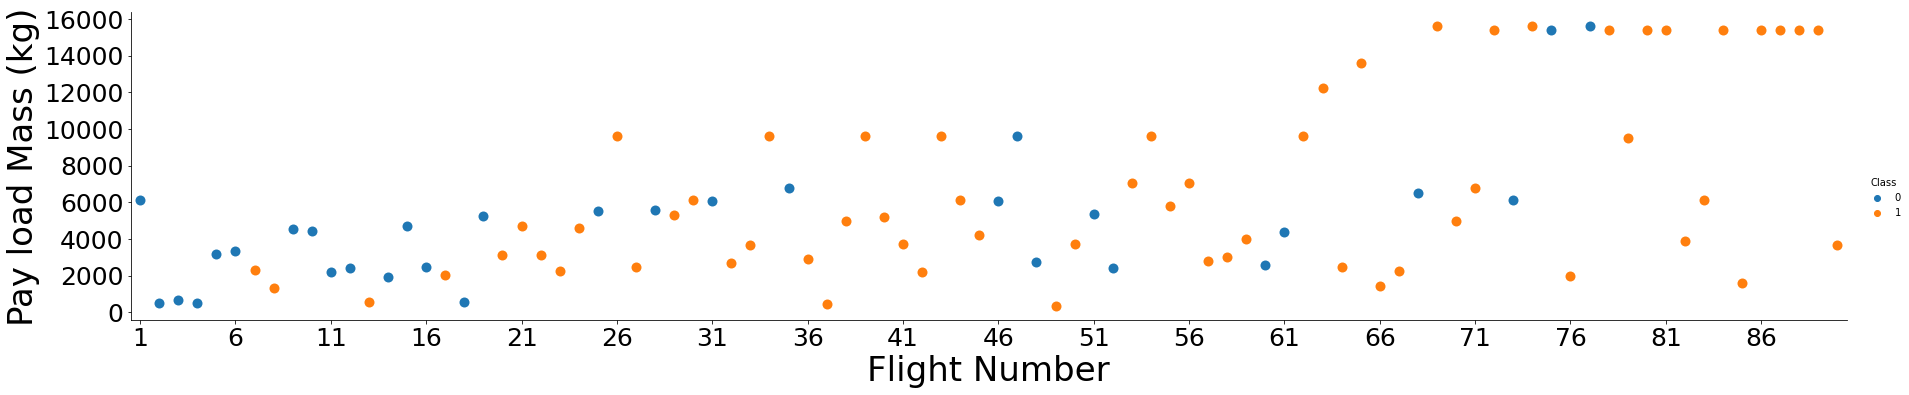

In [26]:
g = sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=34)
plt.ylabel("Pay load Mass (kg)",fontsize=34)
plt.xticks(np.arange(0,90,5), fontsize = 25)
plt.yticks(fontsize = 25)
# Ajustar el tamaño de los puntos
for ax in g.axes.flat:
    for collection in ax.collections:
        collection.set_sizes([100])
plt.show()
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


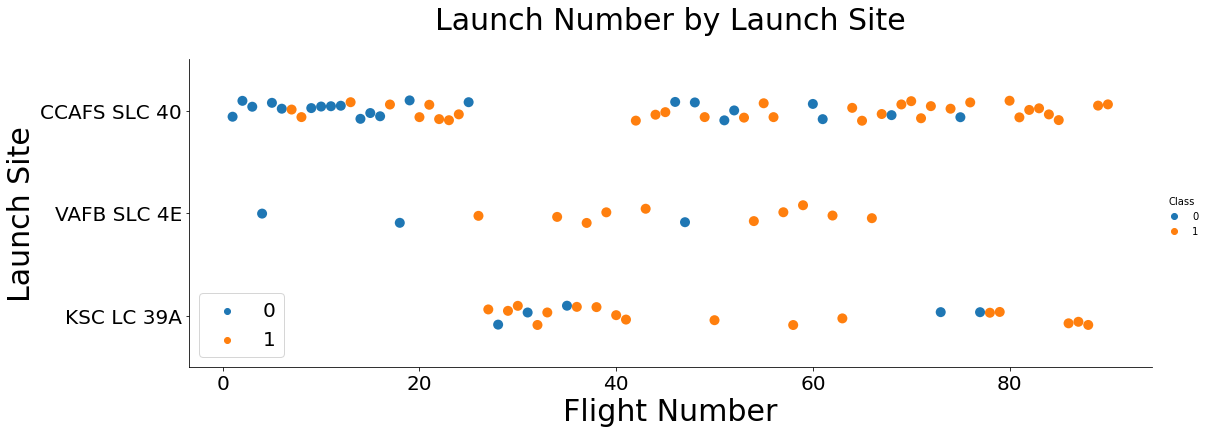

In [129]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
g = sns.catplot( y = 'LaunchSite', x = 'FlightNumber', hue = 'Class', data = df, aspect = 3, jitter = True)
plt.title('Launch Number by Launch Site', fontsize = 30, pad = 30)
plt.xlabel('Flight Number', fontsize = 30)
plt.ylabel('Launch Site', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# Ajustar el tamaño de los puntos
for ax in g.axes.flat:
    for collection in ax.collections:
        collection.set_sizes([100])
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


In [ ]:
A medida que el número de lanzamientos aumenta la tasa de exito tambien lo hace.

In [42]:
#Si miramos las tasas de fallo por lugar de lanzamiento:
launch_stats = df.groupby(['LaunchSite','Class']).size().reset_index(name = 'Count')
launch_totals = df.groupby(['LaunchSite']).size().reset_index(name = 'Total')
launch_totals = launch_stats.merge(launch_totals, on= 'LaunchSite')
launch_stats['Percentage'] =(launch_stats['Count']/launch_totals['Total'])*100
#pivotamos para claridad de visualización:
success_failure = launch_stats.pivot(index = 'LaunchSite', columns = 'Class', values = 'Percentage').reset_index()


In [43]:
success_failure.columns =['LauchSite', 'Failure (%)', 'Success (%)']
success_failure

,LauchSite,Failure (%),Success (%)
0,CCAFS SLC 40,40.000000,60.000000
1,KSC LC 39A,22.727273,77.272727
2,VAFB SLC 4E,23.076923,76.923077


In [44]:
#Quiero ver como evolucionan a lo largo de tiempo.
df['Date'] = pd.to_datetime(df['Date'])

# extremos el año para poder agrupar por el
df['Year'] = df['Date'].dt.year  # Extraer solo el año

# agrupamos los datos por 'Year', 'LaunchSite' y 'Class' para contar los éxitos y fracasos
launch_stats_site_year = df.groupby(['Year', 'LaunchSite', 'Class']).size().reset_index(name='Count')

# 4. Calcular el total de lanzamientos por 'Year' y 'LaunchSite'
launch_totals_site_year = df.groupby(['Year', 'LaunchSite']).size().reset_index(name='Total')

# 5. Unir ambos DataFrames para obtener la información combinada
launch_stats_site_year = launch_stats_site_year.merge(launch_totals_site_year, on=['Year', 'LaunchSite'])

# 6. Calcular el porcentaje de éxito para cada periodo
launch_stats_site_year['Percentage'] = (launch_stats_site_year['Count'] / launch_stats_site_year['Total']) * 100

# 7. Pivotear la tabla para que las clases (éxito y fracaso) sean columnas
evolution_site_year = launch_stats_site_year.pivot_table(index=['Year', 'LaunchSite'], columns='Class', values='Percentage', aggfunc='sum').reset_index()

# 8. Renombrar las columnas para mayor claridad
evolution_site_year.columns = ['Year', 'LaunchSite', 'Failure (%)', 'Success (%)']

# 9. Reemplazar valores NaN con 0 (si hay clases faltantes para un año específico)
evolution_site_year = evolution_site_year.fillna(0)

# 10. Mostrar el resultado
print(evolution_site_year)


    Year    LaunchSite  Failure (%)  Success (%)
0   2010  CCAFS SLC 40   100.000000     0.000000
1   2012  CCAFS SLC 40   100.000000     0.000000
2   2013  CCAFS SLC 40   100.000000     0.000000
3   2013   VAFB SLC 4E   100.000000     0.000000
4   2014  CCAFS SLC 40    66.666667    33.333333
5   2015  CCAFS SLC 40    66.666667    33.333333
6   2016  CCAFS SLC 40    28.571429    71.428571
7   2016   VAFB SLC 4E   100.000000     0.000000
8   2017  CCAFS SLC 40     0.000000   100.000000
9   2017    KSC LC 39A    25.000000    75.000000
10  2017   VAFB SLC 4E     0.000000   100.000000
11  2018  CCAFS SLC 40    50.000000    50.000000
12  2018    KSC LC 39A     0.000000   100.000000
13  2018   VAFB SLC 4E    25.000000    75.000000
14  2019  CCAFS SLC 40    14.285714    85.714286
15  2019    KSC LC 39A     0.000000   100.000000
16  2019   VAFB SLC 4E     0.000000   100.000000
17  2020  CCAFS SLC 40     8.333333    91.666667
18  2020    KSC LC 39A    28.571429    71.428571


### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


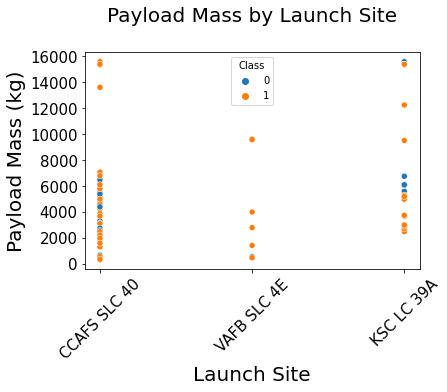

In [127]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.scatterplot(y = 'PayloadMass', x ='LaunchSite', data = df, hue='Class' )
plt.title('Payload Mass by Launch Site', fontsize = 20,pad = 30)
plt.ylabel('Payload Mass (kg)', fontsize = 20)
plt.xlabel('Launch Site',fontsize = 20)
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20)
plt.legend(title ='Class')
plt.show()

Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [100]:
# HINT use groupby method on Orbit column and get the mean of Class column
launch_by_orbit = df.groupby('Orbit')['Class'].mean().reset_index()
launch_by_orbit['Class'] = launch_by_orbit['Class']*100

In [101]:
launch_by_orbit = launch_by_orbit.sort_values(by = 'Class', ascending = False)

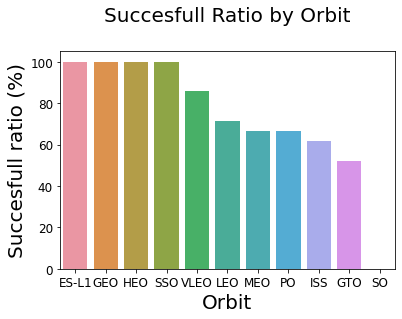

In [126]:
sns.barplot(x= 'Orbit', y = 'Class', data = launch_by_orbit)
plt.title('Succesfull Ratio by Orbit', fontsize = 20, pad = 30)
plt.xlabel('Orbit',fontsize = 20)
plt.ylabel('Succesfull ratio (%)',fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Analyze the plotted bar chart to identify which orbits have the highest success rates.


GTO orbits have the lowest succesfull ratio, about 50%. ES-L1, GEO,HEO and SSO are the most succesfull with 100% success

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


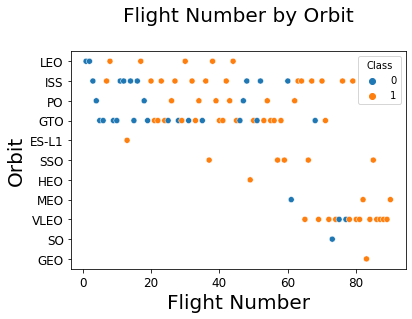

In [125]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x = 'FlightNumber', y ='Orbit', data = df, hue = 'Class')
plt.title('Flight Number by Orbit', fontsize = 20, pad = 30)
plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Orbit',fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


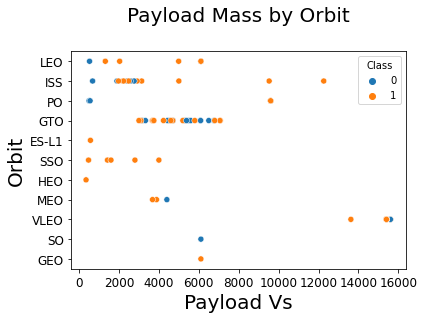

In [130]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x = 'PayloadMass', y ='Orbit', data = df, hue = 'Class')
plt.title('Payload Mass by Orbit',fontsize = 20, pad = 30)
plt.xlabel('Payload Vs', fontsize = 20)
plt.ylabel('Orbit',fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     90 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      90 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     float64       
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

In [142]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


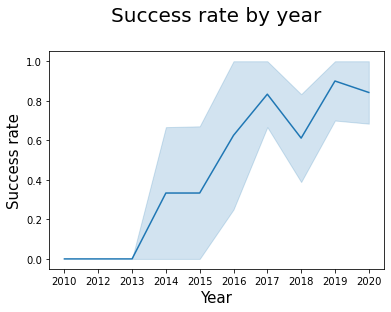

In [145]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.lineplot(x = 'Date', y = 'Class', data = df)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Success rate', fontsize = 15)
plt.title('Success rate by year',fontsize = 20, pad = 30)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [87]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [94]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features,columns = ['Orbit','LaunchSite','LandingPad','Serial'])
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False
86,87,15400.000000,3,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,True,False,False,False
87,88,15400.000000,6,True,True,True,5.0,5,False,False,...,False,False,False,True,False,False,False,False,False,False
88,89,15400.000000,3,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [96]:
features_one_hot = features_one_hot.astype('float64')

In [97]:
# HINT: use astype function
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_ES-L1                          90 non-null     float64
 9   Orbit_GEO                            90 non-null     float64
 10  Orbit_GTO                            90 non-null     float64
 11  Orbit_HEO                         

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [98]:
features_one_hot.to_csv('dataset_part_3_me.csv', index=False)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
